Let's read in some Survey Monkey data on the Star Movies assembled by fivethirtyeight. Besides basic demographic information, respondents were asked about film and character preferences, as well as a few background Star Wars questions. 

In [2]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


Some rows may have invalid values for RespondentID, so let's get rid of those

In [4]:
print (star_wars.shape)
star_wars = star_wars[star_wars["RespondentID"].notnull()]
print (star_wars.shape)

(1187, 38)
(1186, 38)


Respondents were asked whether they had seen any of the films. Let's convert the survey results of 'Yes, 'No', and blank to True, False, and NaN.

In [5]:
yes_no = {"Yes": True,"No":False}

star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no)

star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Cleanup on aisle 6. There are six columns that store whether a respondent has seen each of the (then) six Star Wars films. If the respondent has seen the movie, the value in the cell contains the name of the movie. Let's simplify this by converting the cell values to True or False. We can also simply the column names since they are currently the full name of each of the films. 

In [6]:
#from collections import defaultdict
#columns = star_wars.columns[3:9]
import numpy as np
#test = star_wars.iloc[0][3:9]
d = ({'Star Wars: Episode I  The Phantom Menace': True, 'Star Wars: Episode II  Attack of the Clones': True, 'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True, 'Star Wars: Episode V The Empire Strikes Back': True, 'Star Wars: Episode VI Return of the Jedi': True, np.nan: False,'No':False})

#star_wars.iloc[:,3]
star_wars.iloc[:,3] = star_wars.iloc[:,3].map(d)
star_wars.iloc[:,4] = star_wars.iloc[:,4].map(d)
star_wars.iloc[:,5] = star_wars.iloc[:,5].map(d)
star_wars.iloc[:,6] = star_wars.iloc[:,6].map(d)
star_wars.iloc[:,7] = star_wars.iloc[:,7].map(d)
star_wars.iloc[:,8] = star_wars.iloc[:,8].map(d)

#star_wars = star_wars.rename(columns)

In [7]:
star_wars.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'}, inplace = True)

In [8]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now we can clean up the respondent's film preferences.

In [9]:
print(star_wars.columns.values)

['RespondentID'
 'Have you seen any of the 6 films in the Star Wars franchise?'
 'Do you consider yourself to be a fan of the Star Wars film franchise?'
 'seen_1' 'seen_2' 'seen_3' 'seen_4' 'seen_5' 'seen_6'
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'
 'Unnamed: 10' 'Unnamed: 11' 'Unnamed: 12' 'Unnamed: 13' 'Unnamed: 14'
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'
 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18' 'Unnamed: 19' 'Unnamed: 20'
 'Unnamed: 21' 'Unnamed: 22' 'Unnamed: 23' 'Unnamed: 24' 'Unnamed: 25'
 'Unnamed: 26' 'Unnamed: 27' 'Unnamed: 28' 'Which character shot first?'
 'Are you familiar with the Expanded Universe?'
 'Do you consider yourself to be a fan of the Expanded Universe?Â\x8cÃ¦'
 'Do you consider yourself to be a fan of the Star Trek franchise?'
 'Gender' 'Age' 'Household Income' 'Education' 'Location (

In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1','Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3','Unnamed: 12':'ranking_4','Unnamed: 13':'ranking_5','Unnamed: 14':'ranking_6'},inplace=True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Let's find the highest ranked movie.

(3.7329341317365268, 4.0873205741626792, 4.341317365269461, 3.2727272727272729, 2.513157894736842, 3.0478468899521531)


([<matplotlib.axis.XTick at 0x7faef9c23048>,
 <a list of 6 Text xticklabel objects>)

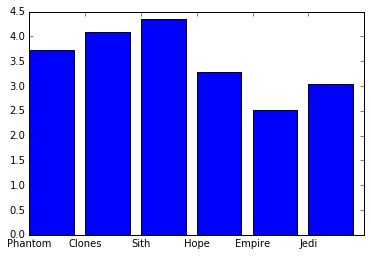

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
ranks = (star_wars["ranking_1"].mean(), star_wars["ranking_2"].mean(),star_wars["ranking_3"].mean(),star_wars["ranking_4"].mean(),star_wars["ranking_5"].mean(),star_wars["ranking_6"].mean())
pos = np.arange(len(ranks))
print (ranks)
films = ['Phantom','Clones','Sith','Hope','Empire','Jedi']
plt.bar(pos,ranks)
plt.xticks(pos,films)

Lower is better. Seems pretty right.

([<matplotlib.axis.XTick at 0x7faef9b702e8>,
 <a list of 6 Text xticklabel objects>)

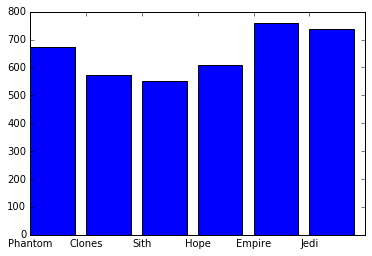

In [12]:
seen = (star_wars["seen_1"].sum(), star_wars["seen_2"].sum(),star_wars["seen_3"].sum(),star_wars["seen_4"].sum(),star_wars["seen_5"].sum(),star_wars["seen_6"].sum())
plt.bar(pos,seen)
plt.xticks(pos,films)

How have so many people not seen A New Hope?

Let's compare some of these results against demographic information

In [13]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

([<matplotlib.axis.XTick at 0x7faef9b34358>,
 <a list of 6 Text xticklabel objects>)

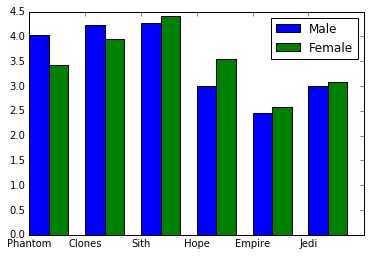

In [14]:
ranks_males = (males["ranking_1"].mean(), males["ranking_2"].mean(),males["ranking_3"].mean(),males["ranking_4"].mean(),males["ranking_5"].mean(),males["ranking_6"].mean())
ranks_females = (females["ranking_1"].mean(), females["ranking_2"].mean(),females["ranking_3"].mean(),females["ranking_4"].mean(),females["ranking_5"].mean(),females["ranking_6"].mean())
plt.bar(pos,ranks_males, 0.35,color='b',label = "Male")
plt.bar(pos+0.35,ranks_females, 0.35, color='g',label = "Female")
plt.legend()
plt.xticks(pos,films)

The first films in each trilogy have the largest differences

([<matplotlib.axis.XTick at 0x7faef9a613c8>,
 <a list of 6 Text xticklabel objects>)

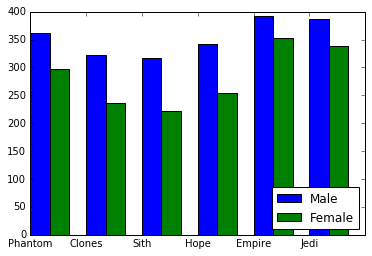

In [17]:
seen_males = (males["seen_1"].sum(), males["seen_2"].sum(),males["seen_3"].sum(),males["seen_4"].sum(),males["seen_5"].sum(),males["seen_6"].sum())
seen_females = (females["seen_1"].sum(), females["seen_2"].sum(),females["seen_3"].sum(),females["seen_4"].sum(),females["seen_5"].sum(),females["seen_6"].sum())
plt.bar(pos,seen_males, 0.35,color='b',label = "Male")
plt.bar(pos+0.35,seen_females, 0.35, color='g',label = "Female")
plt.legend(loc=4)
plt.xticks(pos,films)